In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn import preprocessing 
from scipy.io import arff
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error


In [4]:
data = arff.loadarff("./dataset/Medicaldataset.arff")
df = pd.DataFrame(data[0])
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64.0,1.0,66.0,160.0,83.0,160.0,1.80,0.012,b'negative'
1,21.0,1.0,94.0,98.0,46.0,296.0,6.75,1.060,b'positive'
2,55.0,1.0,64.0,160.0,77.0,270.0,1.99,0.003,b'negative'
3,64.0,1.0,70.0,120.0,55.0,270.0,13.87,0.122,b'positive'
4,55.0,1.0,64.0,112.0,65.0,300.0,1.08,0.003,b'negative'


In [5]:
X = df.iloc[:,df.columns !='class'] #select all features except for class
X_1 = X
y = df['class'].str.decode('utf-8') #transform byte to string 
#print(y)
mapping = {'negative': 0, 'positive': 1} #mapping the string to int
y = y.replace(mapping).to_numpy()  #transform string to int
#print(X.shape) (1319, 8) 
X_1 , y

(       age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
 0     64.0     1.0     66.0          160.0         83.0    160.0   1.80   
 1     21.0     1.0     94.0           98.0         46.0    296.0   6.75   
 2     55.0     1.0     64.0          160.0         77.0    270.0   1.99   
 3     64.0     1.0     70.0          120.0         55.0    270.0  13.87   
 4     55.0     1.0     64.0          112.0         65.0    300.0   1.08   
 ...    ...     ...      ...            ...          ...      ...    ...   
 1314  44.0     1.0     94.0          122.0         67.0    204.0   1.63   
 1315  66.0     1.0     84.0          125.0         55.0    149.0   1.33   
 1316  45.0     1.0     85.0          168.0        104.0     96.0   1.24   
 1317  54.0     1.0     58.0          117.0         68.0    443.0   5.80   
 1318  51.0     1.0     94.0          157.0         79.0    134.0  50.89   
 
       troponin  
 0        0.012  
 1        1.060  
 2        0.003  
 3        0.12

In [6]:
np.unique(y, return_counts=True)


(array([0, 1], dtype=int64), array([509, 810], dtype=int64))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.33, random_state=42) 

In [8]:
#perform feature extraction
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

# Loop over different values of n_estimators
for n_trees in [50, 100, 200, 500]:
    # Create RandomForestClassifier with current n_estimators
    forest = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    
    # Use cross_val_score for evaluation
    scores = cross_val_score(forest, X_1, y, cv=5)  # 5-fold cross-validation
    mean_score = scores.mean()
    
    print(f"n_estimators={n_trees}, Mean Cross-Validation Score: {mean_score}")



n_estimators=50, Mean Cross-Validation Score: 0.9863607558474479
n_estimators=100, Mean Cross-Validation Score: 0.9863607558474479
n_estimators=200, Mean Cross-Validation Score: 0.9863607558474479
n_estimators=500, Mean Cross-Validation Score: 0.9856002995736837


In [9]:
#create and train a random forest
forest= RandomForestClassifier(n_estimators= 200, random_state= 42)
forest.fit(X_train, y_train)

#get the most important features
forest_feats= SelectFromModel(forest, threshold= 'median')
forest_feats.fit(X_train, y_train)

#get training and development sets that have only the most important features
x_train_forest = forest_feats.transform(X_train)
x_devel_forest = forest_feats.transform(X_test)

#see which features were retained
for i in forest_feats.get_support(indices= True):
    print(X_train.columns[i])

age
glucose
kcm
troponin


In [10]:
X_2 = X_1[["age", "glucose", "kcm", "troponin"]]
print(X_2)

       age  glucose    kcm  troponin
0     64.0    160.0   1.80     0.012
1     21.0    296.0   6.75     1.060
2     55.0    270.0   1.99     0.003
3     64.0    270.0  13.87     0.122
4     55.0    300.0   1.08     0.003
...    ...      ...    ...       ...
1314  44.0    204.0   1.63     0.006
1315  66.0    149.0   1.33     0.172
1316  45.0     96.0   1.24     4.250
1317  54.0    443.0   5.80     0.359
1318  51.0    134.0  50.89     1.770

[1319 rows x 4 columns]


In [11]:
len(X_2), X_2.columns, len(X_2.columns)

(1319, Index(['age', 'glucose', 'kcm', 'troponin'], dtype='object'), 4)

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

features = preprocessing.quantile_transform(X_2)

features

array([[0.7007007 , 0.71471471, 0.29029029, 0.45645646],
       [0.00600601, 0.94171965, 0.78128128, 0.90375316],
       [0.43843844, 0.92092092, 0.33533534, 0.07507508],
       ...,
       [0.20620621, 0.21871872, 0.12712713, 0.98371691],
       [0.40640641, 0.99499499, 0.74938614, 0.83069302],
       [0.34884885, 0.61011011, 0.93793794, 0.94521619]])

# Neural Network Classifier & Regressor

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit

algorithm_globals.random_seed = 123

In [14]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

y = 2 * y - 1  # in {-1, +1}

X_train, X_test, y_train, y_test = train_test_split(
    features, y, train_size=0.8, random_state=algorithm_globals.random_seed
)
X_train, y_train

(array([[0.73223223, 0.81931932, 0.38788789, 0.07507508],
        [0.63413413, 0.01101101, 0.85544379, 0.81948981],
        [0.89439439, 0.72322322, 0.55705706, 0.53253253],
        ...,
        [0.31631632, 0.8973974 , 0.56756757, 0.95734034],
        [0.07507508, 0.18168168, 0.31881882, 0.07507508],
        [0.66916917, 0.8048048 , 0.73981963, 0.22022022]]),
 array([-1,  1,  1, ...,  1, -1, -1], dtype=int64))

d:\FHNW_Medical_Informatics\Python\Python_Learn\Q_C_Project\.venv\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


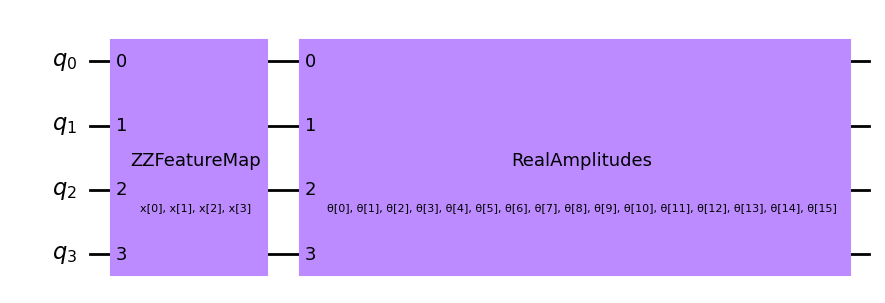

In [15]:
# construct QNN with the QNNCircuit's default ZZFeatureMap feature map and RealAmplitudes ansatz.
qc = QNNCircuit(num_qubits=4)
qc.draw(output="mpl")

In [16]:
#create a quantum neural network classifier
estimator_qnn = EstimatorQNN(circuit=qc)

In [17]:

X_train, y_train

(array([[0.73223223, 0.81931932, 0.38788789, 0.07507508],
        [0.63413413, 0.01101101, 0.85544379, 0.81948981],
        [0.89439439, 0.72322322, 0.55705706, 0.53253253],
        ...,
        [0.31631632, 0.8973974 , 0.56756757, 0.95734034],
        [0.07507508, 0.18168168, 0.31881882, 0.07507508],
        [0.66916917, 0.8048048 , 0.73981963, 0.22022022]]),
 array([-1,  1,  1, ...,  1, -1, -1], dtype=int64))

In [18]:
# QNN maps inputs to [-1, +1]
estimator_qnn.forward(features[0, :], algorithm_globals.random.random(estimator_qnn.num_weights))

array([[-0.00458707]])

We will add a callback function called callback_graph. This will be called for each iteration of the optimizer and will be passed two parameters: the current weights and the value of the objective function at those weights. For our function, we append the value of the objective function to an array so we can plot iteration versus objective function value and update the graph with each iteration. However, you can do whatever you want with a callback function as long as it gets the two parameters mentioned passed.

In [19]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [20]:
# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=60), callback=callback_graph
)

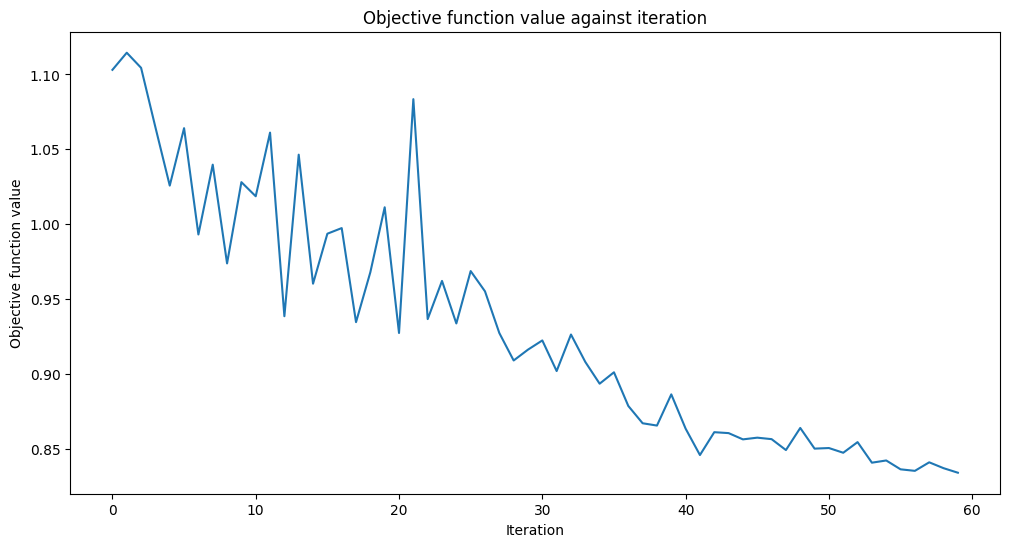

0.6477272727272727

In [21]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
estimator_classifier.fit(X_train, y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
estimator_classifier.score(X_test, y_test)

In [23]:
train_score_qnn_ra = estimator_classifier.score(X_train, y_train)
test_score_qnn_ra = estimator_classifier.score(X_test, y_test)

print(f"QNN on the training dataset: {train_score_qnn_ra:.2f}")
print(f"QNN on the test dataset:     {test_score_qnn_ra:.2f}")

QNN on the training dataset: 0.68
QNN on the test dataset:     0.65


In [24]:
from sklearn.metrics import classification_report
classification_report(y_test, estimator_classifier.predict(X_test))

'              precision    recall  f1-score   support\n\n          -1       0.54      0.67      0.60       103\n           1       0.75      0.63      0.69       161\n\n    accuracy                           0.65       264\n   macro avg       0.64      0.65      0.64       264\nweighted avg       0.67      0.65      0.65       264\n'